In [ ]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 

def load_data():
    training_data = []
    for img in tqdm(os.listdir()):
        #label = label_img(img)
        #path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append(np.array(img))
    shuffle(training_data)
    np.save('cluster_data.npy', training_data)
    return training_data

In [ ]:
train_Data = load_data()

In [ ]:
train_Data[0].shape

_ :  [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] contours :  [array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32)]  hierarchy :  [[[-1 -1 -1 -1]]]


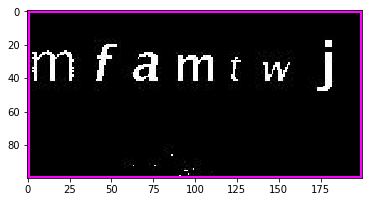

In [36]:
import cv2  
import numpy as np 
import matplotlib.pyplot as plt

image = cv2.imread("captcha_1.jpeg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale
#plt.imshow(gray)
_,thresh = cv2.threshold(gray,40,255,cv2.THRESH_BINARY_INV) 
#threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 13) # dilate
_,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print("_ : ",_,"contours : ",contours," hierarchy : ",hierarchy)
#plt.imshow(_)
# get contours
# for each contour found, draw a rectangle around it on original 
image
for contour in contours:
 
    # get rectangle bounding contour
 
    [x,y,w,h] = cv2.boundingRect(contour)
    # discard areas that are too large
 
    if h>300 and w>300:
 
        continue
    # discard areas that are too small
 
    if h<40 or w<40:
 
        continue
    # draw rectangle around contour on original image
 
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
# write original image with added contours to disk  
 
plt.imshow(image) 